This project will be all about regression. I need to choose between Ordinary Least Square or using Gradient Descent

In [97]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




In [55]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

In [56]:
df = pd.read_csv("datasets/Final_data.csv")
df_two = pd.read_csv("datasets/expanded_fitness_data.csv")

In [57]:
df.head(10)


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Daily meals frequency,Physical exercise,Carbs,Proteins,Fats,Calories,meal_name,meal_type,diet_type,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,Name of Exercise,Sets,Reps,Benefit,Burns Calories (per 30 min),Target Muscle Group,Equipment Needed,Difficulty Level,Body Part,Type of Muscle,Workout,BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,26.800377,1.50,3.99,2.01,24.87,2.99,0.01,267.68,106.05,71.63,1806.0,Other,Lunch,Vegan,31.77,1729.94,285.05,120.47,Grilled,16.24,110.79,1.31,Decline Push-ups,4.99,20.91,Improves shoulder health and posture,342.58,"Shoulders, Triceps",Cable Machine,Advanced,Legs,Lats,Dumbbell flyes,24.870447,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,27.655021,1.90,4.00,2.01,23.48,3.01,0.97,214.32,85.41,56.97,1577.0,Other,Lunch,Vegetarian,12.34,693.08,300.61,109.15,Fried,16.47,12.01,1.92,Bear Crawls,4.01,16.15,Strengthens lower abs,357.16,"Back, Core, Shoulders",Step or Box,Intermediate,Chest,Lats,Lateral raises,23.479709,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,24.320821,1.88,2.99,1.02,21.15,1.99,-0.02,246.04,98.11,65.48,1608.0,Other,Breakfast,Paleo,42.81,2142.48,215.42,399.43,Boiled,54.35,6.09,4.70,Dips,5.00,21.90,Builds chest strength,359.63,"Quadriceps, Glutes",Step or Box,Intermediate,Arms,Grip Strength,Standing calf raises,21.148123,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,32.813572,2.50,3.99,1.99,32.45,3.00,0.04,203.22,80.84,54.56,2657.0,Other,Lunch,Paleo,9.34,123.20,9.70,314.31,Fried,27.73,103.72,4.85,Mountain Climbers,4.01,16.92,Improves coordination and cardiovascular health,351.65,"Biceps, Forearms",Parallel Bars or Chair,Advanced,Shoulders,Upper,Incline dumbbell flyes,32.449827,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,17.307319,2.91,4.00,2.00,14.83,3.00,3.00,332.79,133.05,88.43,1470.0,Other,Breakfast,Vegan,23.78,1935.11,116.89,99.22,Baked,34.16,46.55,3.07,Bicep Curls,4.99,15.01,Targets obliques and improves core rotation,329.36,"Chest, Triceps",Wall,Advanced,Abs,Wrist Flexors,Military press,14.831372,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low
5,53.19,Female,105.05,1.84,176.52,130.60,61.84,0.69,453.33,Yoga,32.049064,2.91,3.02,1.00,31.03,2.99,-0.04,170.86,67.92,46.06,2767.0,Other,Snack,Keto,15.89,2382.39,36.38,416.54,Steamed,20.98,54.64,3.38,Leg Press,4.00,25.10,Builds explosive power,374.56,"Core, Obliques",Resistance Band or Cable Machine,Beginner,Arms,Wrist Flexors,Skull crushers,31.028474,1369.66,0.498985,0.646549,0.599581,0.739860,2313.67,71.382458,516.8928,1.505159e+20,Very High
6,23.17,Male,58.41,1.78,184.75,140.90,58.01,1.67,1953.90,Strength,20.546292,2.71,4.96,3.00,18.44,2.02,-0.03,280.33,112.35,74.97,1867.0,Other,Breakfast,Low-Carb,12.48,2220.46,56.69,289.93,Fried,52.43,46.08,3.81,Thrusters,5.01,25.04,Strengthens back and improves posture,328.94,Core,None or Dumbbells,Advanced,Shoulders,Wrist Flexors,Barbell rows,18.435172,2245.45,0.499374,1.923472,0.654016,0.762652,-86.90,46.408911,1098.6596,5.210106e+19,Low
7,55.92,Female,84.07,1.63,183.87,141.12,51.79,1.01,727.81,Yoga,32.088176,2.88,3.97,2.01,31.64,2.99,0.00,262.57,105.41,70.37,2191.0,Other,Snack,Low-Carb,2.87,1501.99,74.70,487.6

In [58]:
df_two.head(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Daily meals frequency,Physical exercise,Carbs,Proteins,Fats,Calories,meal_name,meal_type,diet_type,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,is_healthy,Name of Exercise,Sets,Reps,Benefit,Burns Calories (per 30 min),Target Muscle Group,Equipment Needed,Difficulty Level,Body Part,Type of Muscle,Workout
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,26.800377,1.50,3.99,2.01,24.87,2.99,0.01,267.68,106.05,71.63,1806.0,Affect Stew,Lunch,Vegan,31.77,1729.94,285.05,120.47,Grilled,16.24,110.79,1.31,-0.00,Decline Push-ups,4.99,20.91,Improves shoulder health and posture,342.58,"Shoulders, Triceps",Cable Machine,Advanced,Legs,Lats,Dumbbell flyes
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,27.655021,1.90,4.00,2.01,23.48,3.01,0.97,214.32,85.41,56.97,1577.0,Writer Rice,Lunch,Vegetarian,12.34,693.08,300.61,109.15,Fried,16.47,12.01,1.92,0.01,Bear Crawls,4.01,16.15,Strengthens lower abs,357.16,"Back, Core, Shoulders",Step or Box,Intermediate,Chest,Lats,Lateral raises
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,24.320821,1.88,2.99,1.02,21.15,1.99,-0.02,246.04,98.11,65.48,1608.0,Television Stew,Breakfast,Paleo,42.81,2142.48,215.42,399.43,Boiled,54.35,6.09,4.70,0.00,Dips,5.00,21.90,Builds chest strength,359.63,"Quadriceps, Glutes",Step or Box,Intermediate,Arms,Grip Strength,Standing calf raises
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,32.813572,2.50,3.99,1.99,32.45,3.00,0.04,203.22,80.84,54.56,2657.0,Plant Curry,Lunch,Paleo,9.34,123.20,9.70,314.31,Fried,27.73,103.72,4.85,0.01,Mountain Climbers,4.01,16.92,Improves coordination and cardiovascular health,351.65,"Biceps, Forearms",Parallel Bars or Chair,Advanced,Shoulders,Upper,Incline dumbbell flyes
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,17.307319,2.91,4.00,2.00,14.83,3.00,3.00,332.79,133.05,88.43,1470.0,Her Stew,Breakfast,Vegan,23.78,1935.11,116.89,99.22,Baked,34.16,46.55,3.07,0.01,Bicep Curls,4.99,15.01,Targets obliques and improves core rotation,329.36,"Chest, Triceps",Wall,Advanced,Abs,Wrist Flexors,Military press
5,53.19,Female,105.05,1.84,176.52,130.60,61.84,0.69,453.33,Yoga,32.049064,2.91,3.02,1.00,31.03,2.99,-0.04,170.86,67.92,46.06,2767.0,Plan Salad,Snack,Keto,15.89,2382.39,36.38,416.54,Steamed,20.98,54.64,3.38,0.01,Leg Press,4.00,25.10,Builds explosive power,374.56,"Core, Obliques",Resistance Band or Cable Machine,Beginner,Arms,Wrist Flexors,Skull crushers
6,23.17,Male,58.41,1.78,184.75,140.90,58.01,1.67,1953.90,Strength,20.546292,2.71,4.96,3.00,18.44,2.02,-0.03,280.33,112.35,74.97,1867.0,Relationship Rice,Breakfast,Low-Carb,12.48,2220.46,56.69,289.93,Fried,52.43,46.08,3.81,1.00,Thrusters,5.01,25.04,Strengthens back and improves posture,328.94,Core,None or Dumbbells,Advanced,Shoulders,Wrist Flexors,Barbell rows
7,55.92,Female,84.07,1.63,183.87,141.12,51.79,1.01,727.81,Yoga,32.088176,2.88,3.97,2.01,31.64,2.99,0.00,262.57,105.41,70.37,2191.0,Cultural Rice,Snack,Low-Carb,2.87,1501.99,74.70,487.67,Raw,38.57,36.64,3.16,-0.00,Turkish Get-ups,4.97,18.95,Improves core stability and upper body strength,363.56,"Back, Biceps",Pull-up Bar,Intermediate,Back,Lower,Hammer curl
8,24.11,Female,88.58,1.79,176.78,154.07,65.19,1.76,2062.37,Strength,27.367246,3.49,4.01,3.02,27.65,3.00,0.02,173.08,69.44,45.91,2587.0,Leader Sandwich,Lunch,Vegan,0.72,293.36,188.26,123.56,Boiled,45.85,14.31,2.81,-0.00,Glute Bridges,3.99,24.10,Full body workout,349.51,"Upper Chest, Triceps",Barbell,Beginner,Chest,Middle,Russian twists
9,39.19,Female,50.32,1.60,166.88,128.04,49.91,1.17,1157.25,Strength,21.909379,2.49,2.00,1.00,19.66,3.01,0.02,191.06,76.76,50.71,1247.0,Fact Curry,Lunch,Paleo,50.02,757.93,291.34,415.04,Grilled,18.95,26.51,1.60,0.00,Step-ups,4.02,16.09,Bui

In [59]:
print(df_two.columns)
print("\n")

df_two.describe()

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI', 'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins', 'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g', 'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method', 'prep_time_min', 'cook_time_min', 'rating', 'is_healthy', 'Name of Exercise', 'Sets', 'Reps', 'Benefit', 'Burns Calories (per 30 min)', 'Target Muscle Group', 'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle', 'Workout'], dtype='object')




,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Daily meals frequency,Physical exercise,Carbs,Proteins,Fats,Calories,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,prep_time_min,cook_time_min,rating,is_healthy,Sets,Reps,Burns Calories (per 30 min)
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,38.851453,73.898832,1.723093,179.889702,143.704306,62.195813,1.259446,1280.109600,26.101313,2.627485,3.318629,1.809176,24.921680,2.864804,0.452503,249.778592,99.91829,66.612172,2024.418300,24.531042,1258.139709,148.465602,302.719499,33.517447,61.502164,2.989303,0.088516,4.425059,19.427316,344.046515
std,12.114580,21.173010,0.127033,11.510805,14.267688,7.289351,0.341336,502.228982,4.996160,0.604724,0.911198,0.736204,6.701126,0.636649,0.986628,55.108623,22.04367,14.699284,541.891521,14.446105,716.618987,87.382817,115.711949,16.526869,33.579746,1.157692,0.284207,0.579596,3.679707,32.138782
min,18.000000,39.180000,1.490000,159.310000,119.070000,49.490000,0.490000,323.110000,11.333134,1.460000,1.940000,1.000000,12.040000,1.950000,-0.070000,137.720000,55.17000,36.590000,781.000000,-0.670000,19.220000,-3.890000,95.950000,3.950000,3.350000,0.930000,-0.020000,2.960000,4.850000,128.750000
25%,28.170000,58.160000,1.620000,170.057500,131.220000,55.960000,1.050000,910.800000,22.387807,2.170000,2.980000,1.010000,20.097500,2.020000,-0.010000,207.547500,83.04000,55.340000,1634.000000,11.990000,645.127500,71.970000,207.217500,18.587500,32.477500,1.940000,-0.000000,4.000000,16.120000,337.600000
50%,39.865000,70.000000,1.710000,180.140000,142.990000,62.200000,1.270000,1231.450000,25.822504,2.610000,3.010000,1.990000,24.120000,3.000000,0.010000,242.900000,97.14500,64.770000,1919.000000,24.060000,1267.650000,149.795000,300.015000,34.330000,60.920000,3.000000,0.000000,4.020000,19.900000,348.605000
75%,49.630000,86.100000,1.800000,189.425000,156.060000,68.090000,1.460000,1553.112500,29.676026,3.120000,4.000000,2.020000,28.560000,3.010000,0.040000,283.975000,113.64000,75.752500,2360.000000,37.490000,1850.892500,221.840000,401.860000,47.940000,89.375000,4.000000,0.010000,5.000000,22.880000,360.472500
max,59.670000,130.770000,2.010000,199.640000,169.840000,74.500000,2.020000,2890.820000,35.000000,3.730000,5.060000,3.050000,50.230000,4.040000,4.050000,462.490000,185.34000,123.420000,3641.000000,50.510000,2527.270000,303.990000,507.520000,61.290000,121.460000,5.060000,1.020000,5.050000,30.120000,381.710000


In [94]:
# finish this function 
# finsih inputting test_size and random_state values

def splitdataset(df):
    X = df.drop(columns=['Calories_Burned'])
    y = df['Calories_Burned']

    X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X, y, X_train, X_test, y_train, y_test





In [66]:
def clean_data(X):
        cols_to_drop = [
        'Name of Exercise', 'meal_name', 'Workout', 'cooking_method', 'Benefit',
        'Target Muscle Group', 'Equipment Needed', 'Body Part', 'Type of Muscle',
        'Difficulty Level', 'Workout_Type', 'diet_type', 'meal_type',
        'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin', 'BMI_calc',
        'cal_from_macros', 'pct_carbs', 'pct_HRR', 'pct_maxHR',
        'cal_balance', 'prep_time_min', 'cook_time_min'
    ]
        X = X.drop(columns=[col for col in cols_to_drop if col in X.columns])
        X = X.dropna()
        
        return X.reset_index(drop=True)

In [67]:

print("before clean: \n")
print(df.columns)
df_clean = clean_data(df)

print("\nAfter Clean: \n",df_clean.shape)
df_clean.columns

before clean: 

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI', 'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins', 'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g', 'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method', 'prep_time_min', 'cook_time_min', 'rating', 'Name of Exercise', 'Sets', 'Reps', 'Benefit', 'Burns Calories (per 30 min)', 'Target Muscle Group', 'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle', 'Workout', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg', 'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn', 'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin'], dtype='object')

After Clean: 
 (20000, 31)


Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI', 'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins', 'Fats', 'Calories', 'sugar_g', 'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'rating', 'Sets', 'Reps', 'Burns Calories (per 30 min)', 'protein_per_kg', 'lean_mass_kg', 'expected_burn'], dtype='object')

In [68]:
# Predict Daily Water Intake
# Ok I will try to single out columns for a linear regression question I have: Does exercise intensity and body composition predict how much water a person drinks daily?
# Features: Workout_Frequency (days/week), Session_Duration (hours), Calories_Burned, Weight (kg), Avg_BPM, Fat_Percentage
# Target: Water_Intake (liters)

def clean_prob_one(X):
    cols_to_keep = ['Workout_Frequency (days/week)','Name of Exercise','Session_Duration (hours)', 'Calories_Burned', 'Weight (kg)','Avg_BPM','Fat_Percentage','Water_Intake (liters)']
    X = X.loc[:,cols_to_keep]

    return X


print("applying cleaned function for first regression question/problem: \n")
prob_one = clean_prob_one(df)
prob_one.columns

applying cleaned function for first regression question/problem: 



Index(['Workout_Frequency (days/week)', 'Name of Exercise', 'Session_Duration (hours)', 'Calories_Burned', 'Weight (kg)', 'Avg_BPM', 'Fat_Percentage', 'Water_Intake (liters)'], dtype='object')

In [104]:
def regression_clean(df):
    cols_to_keep = ['Workout_Frequency (days/week)','Session_Duration (hours)', 'Calories_Burned', 'Weight (kg)','Avg_BPM','Fat_Percentage','Water_Intake (liters)']
    df_clean  = df.loc[:,cols_to_keep]
    return df_clean

df_clean = regression_clean(df)

# Split the CLEANED data, not the original df
X, y, X_train, X_test, y_train, y_test = splitdataset(df_clean)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [105]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate the model
print("=== Linear Regression Results ===")
print(f"R² Score: {r2_score(y_test, predictions):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, predictions):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, predictions):.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, predictions)):.4f}")

# Show model coefficients
print("\n=== Model Coefficients ===")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

# Compare actual vs predicted (first 10 samples)
print("\n=== Actual vs Predicted (first 10) ===")
comparison = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': predictions[:10],
    'Difference': y_test.values[:10] - predictions[:10]
})
print(comparison)

=== Linear Regression Results ===
R² Score: 0.6613
Mean Absolute Error: 230.4477
Mean Squared Error: 84463.0410
Root Mean Squared Error: 290.6253

=== Model Coefficients ===
Workout_Frequency (days/week): 62.6898
Session_Duration (hours): 1082.3880
Weight (kg): -0.2710
Avg_BPM: -0.0723
Fat_Percentage: -0.0506
Water_Intake (liters): 26.1184
Intercept: -327.9197

=== Actual vs Predicted (first 10) ===
    Actual    Predicted  Difference
0   825.93  1200.589996 -374.659996
1  1335.85  1828.795898 -492.945898
2   864.75   937.015655  -72.265655
3  1257.26  1405.163417 -147.903417
4   758.86   820.622044  -61.762044
5  1478.37  1435.737806   42.632194
6  1394.05  1914.667241 -520.617241
7  1229.82  1284.010931  -54.190931
8   785.45  1131.094106 -345.644106
9  1039.34  1186.938770 -147.598770


In [ ]:
print("The model above sucks so rip, hopefully gonna optimize soon")

In [64]:
prob_one.describe()

,Workout_Frequency (days/week),Session_Duration (hours),Calories_Burned,Weight (kg),Avg_BPM,Fat_Percentage,Water_Intake (liters)
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,3.318629,1.259446,1280.109600,73.898832,143.704306,26.101313,2.627485
std,0.911198,0.341336,502.228982,21.173010,14.267688,4.996160,0.604724
min,1.940000,0.490000,323.110000,39.180000,119.070000,11.333134,1.460000
25%,2.980000,1.050000,910.800000,58.160000,131.220000,22.387807,2.170000
50%,3.010000,1.270000,1231.450000,70.000000,142.990000,25.822504,2.610000
75%,4.000000,1.460000,1553.112500,86.100000,156.060000,29.676026,3.120000
max,5.060000,2.020000,2890.820000,130.770000,169.840000,35.000000,3.730000


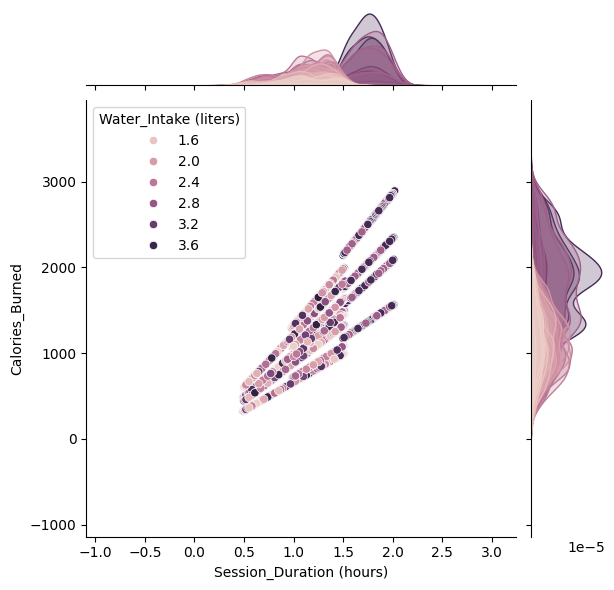

In [65]:


# sns.lmplot(data=prob_one, x="Workout_Frequency (days/week)", y="Calories_Burned")
# sns.lmplot(data=prob_one, x="Workout_Frequency (days/week)", y="Water_Intake (liters)")

sns.jointplot(data=prob_one, x="Session_Duration (hours)",y="Calories_Burned", hue="Water_Intake (liters)")

# this line automatically plots the regression line for me, using this function (just for visualizations right now)




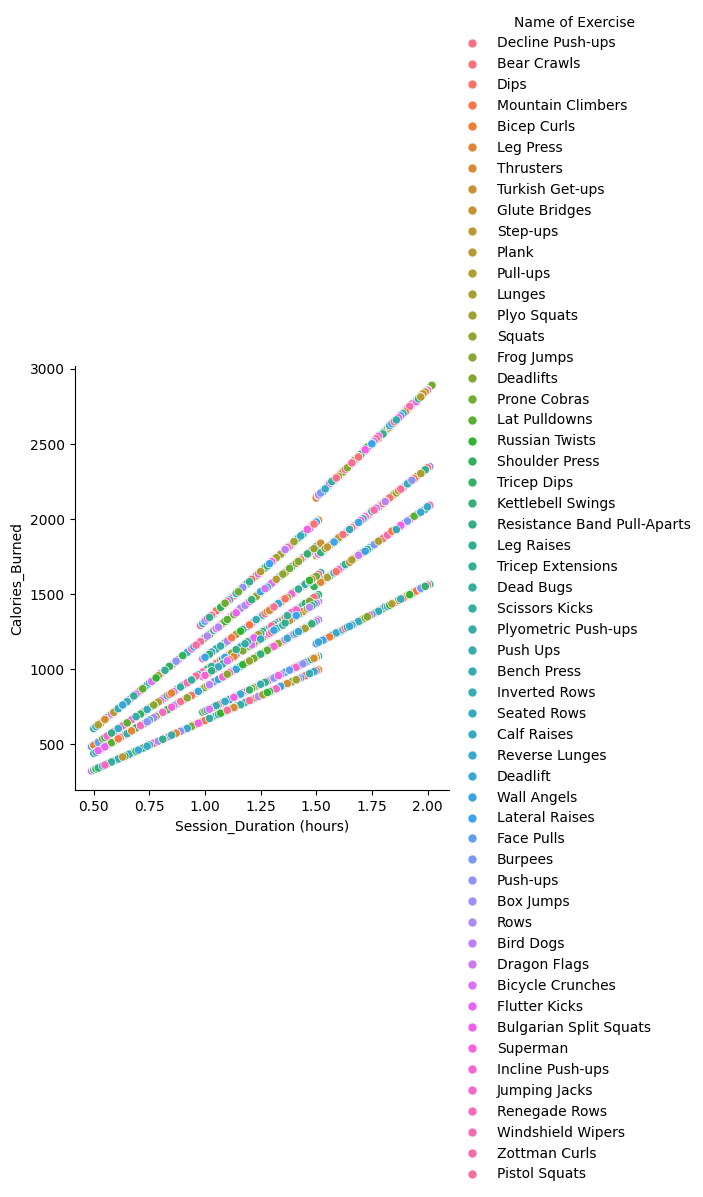

In [75]:
sns.relplot(
    data=prob_one,
    x="Session_Duration (hours)",
    y="Calories_Burned",
    hue="Name of Exercise",
    kind="scatter"
)




THIS IS A GRAPH WITH A LOT OF NOISE, CANNOT DEDUCE A LOT FROM HERE


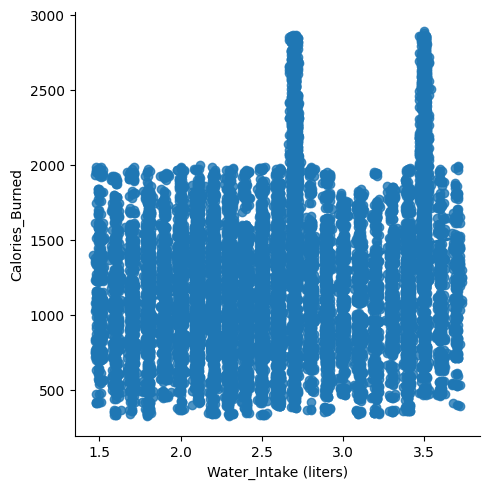

In [81]:

sns.lmplot(x="Water_Intake (liters)",y="Calories_Burned",data=prob_one)
print("THIS IS A GRAPH WITH A LOT OF NOISE, CANNOT DEDUCE A LOT FROM HERE")

honestly this looks like a weak correlation between water intake and calories burned, I guess I was wrong with my assessment, however lets look at other variables


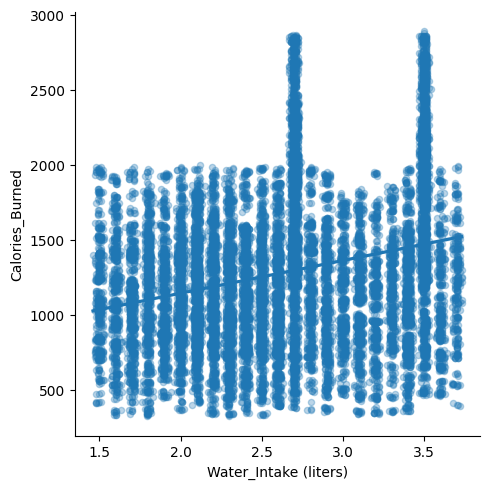

In [92]:
x = prob_one[["Water_Intake (liters)","Calories_Burned"]].corr()
sns.lmplot(
    x="Water_Intake (liters)",
    y="Calories_Burned",
    data=prob_one,
    scatter_kws={"alpha": 0.3, "s":20}
)

print("honestly this looks like a weak correlation between water intake and calories burned, I guess I was wrong with my assessment, however lets look at other variables")

I tried to go even narrower by only focusing on bench presses in this graph


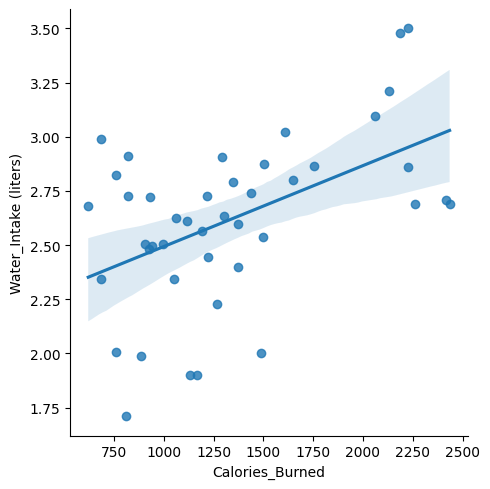

In [93]:
print("I tried to go even narrower by only focusing on bench presses in this graph")
bench_press = prob_one[prob_one["Name of Exercise"] == "Bench Press"]

bench_avg = bench_press.groupby("Workout_Frequency (days/week)").mean(numeric_only=True).reset_index()
sns.lmplot(data=bench_avg, x="Calories_Burned", y="Water_Intake (liters)")



